In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Configuration temporaire pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)

On importe les fichiers

In [3]:
# !!! Ne pas oublier de mettre le projet github en public

games = pd.read_csv('https://raw.githubusercontent.com/StephaneDurig/Projet-Jedha/master/Olympics_Games.csv')
country = pd.read_csv('https://raw.githubusercontent.com/StephaneDurig/Projet-Jedha/master/Olympics_Country.csv')
results = pd.read_csv('https://raw.githubusercontent.com/StephaneDurig/Projet-Jedha/master/Olympic_Results.csv')
athlete = pd.read_csv('https://raw.githubusercontent.com/StephaneDurig/Projet-Jedha/master/Olympic_Athlete_Bio.csv')
ath_event_res = pd.read_csv('https://raw.githubusercontent.com/StephaneDurig/Projet-Jedha/master/Olympic_Athlete_Event_Results.csv')
medal = pd.read_csv('https://raw.githubusercontent.com/StephaneDurig/Projet-Jedha/master/Olympic_Games_Medal_Tally.csv')

On concatène les fichiers

In [4]:
df = games.merge(country, on='country_noc', how='left')
df = df.merge(ath_event_res, on='edition_id',how='left') 
df = df.merge(athlete,on='athlete_id',how='left')


## Analyse du dataset

In [5]:
# Les 5 premières lignes du dataset
df.head()

,edition_x,edition_id,edition_url,year,city,country_flag_url,country_noc_x,start_date,end_date,competition_date,isHeld,country_x,edition_y,country_noc_y,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,name,sex,born,height,weight,country_y,country_noc,description,special_notes
0,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN,Greece,1896 Summer Olympics,BUL,Artistic Gymnastics,"Horse Vault, Men",70002.0,Charles Champaud,31002.0,AC,na,False,Charles Champaud,Male,1865-01-01,na,na,Bulgaria,BUL,"In some 1896 sources, Charles Champaud may be ...",na
1,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN,Greece,1896 Summer Olympics,BUL,Artistic Gymnastics,"Parallel Bars, Men",70006.0,Charles Champaud,31002.0,AC,na,False,Charles Champaud,Male,1865-01-01,na,na,Bulgaria,BUL,"In some 1896 sources, Charles Champaud may be ...",na
2,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN,Greece,1896 Summer Olympics,BUL,Artistic Gymnastics,"Pommelled Horse, Men",70003.0,Charles Champaud,31002.0,AC,na,False,Charles Champaud,Male,1865-01-01,na,na,Bulgaria,BUL,"In some 1896 sources, Charles Champaud may be ...",na
3,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN,Greece,1896 Summer Olympics,BUL,Athletics,"Pole Vault, Men",56024.0,Charles Champaud,31002.0,DNS,na,False,Charles Champaud,Male,1865-01-01,na,na,Bulgaria,BUL,"In some 1896 sources, Charles Champaud may be ...",na
4,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN,Greece,1896 Summer Olympics,AUT,Cycling Road,"Road Race, Individual, Men",153005.0,Adolf Schmal,16491.0,DNS,na,False,Adolf Schmal,Male,1872-09-18,na,na,Austria,AUT,Adolf Schmal won a single Olympic title in Ath...,na


In [6]:
# Nombre de lignes et de colonnes
df.shape

(314916, 31)

In [7]:
# Calcul du nombre de valeurs 'NaN'
df.isna().sum()

edition_x                0
edition_id               0
edition_url              0
year                     0
city                     0
country_flag_url         0
country_noc_x            0
start_date            3155
end_date             10254
competition_date         0
isHeld              314911
country_x                0
edition_y                9
country_noc_y            9
sport                    9
event                    9
result_id                9
athlete                  9
athlete_id               9
pos                      9
medal                    9
isTeamSport              9
name                     9
sex                      9
born                     9
height                   9
weight                   9
country_y                9
country_noc              9
description              9
special_notes            9
dtype: int64

In [8]:
# Calul du pourcentage de valeurs manquantes ( soit 'NaN' soit 'na')
nan_percentage = df.isna().sum().sum() / (df.shape[0] * df.shape[1]) * 100
na_percentage = (df == 'na').sum().sum() / (df.shape[0] * df.shape[1]) * 100

total_percentage = nan_percentage + na_percentage
total_percentage

11.704370525432486

Edition des colonnes pour savoir lesquelles garder

In [9]:
df.columns

Index(['edition_x', 'edition_id', 'edition_url', 'year', 'city',
       'country_flag_url', 'country_noc_x', 'start_date', 'end_date',
       'competition_date', 'isHeld', 'country_x', 'edition_y', 'country_noc_y',
       'sport', 'event', 'result_id', 'athlete', 'athlete_id', 'pos', 'medal',
       'isTeamSport', 'name', 'sex', 'born', 'height', 'weight', 'country_y',
       'country_noc', 'description', 'special_notes'],
      dtype='object')

Suppression des colonnes non utiles à la poursuite du projet

In [10]:
df = df.drop(['edition_url',
              'country_flag_url', 
              'start_date', 
              'end_date', 
              'isHeld',
              'edition_y',
              'country_noc_y',
              'medal',
              'name',
              'description', 
              'special_notes'],
              axis=1)

Rangement des colonnes dans l'ordre voulu

In [11]:
# Methode 1
column_to_move = df.pop('country_x')  # Extraction de la colonne à déplacer
df.insert(5, 'country_x', column_to_move)  # Insertion de la colonne à la position souhaitée

"""
# Methode 2
df.insert(18, 'country_noc', df.pop('country_noc') )  # Insertion de la colonne à la position souhaitée
"""

"\n# Methode 2\ndf.insert(18, 'country_noc', df.pop('country_noc') )  # Insertion de la colonne à la position souhaitée\n"

Renommage des colonnes

In [12]:
# Créer un dictionnaire de mapping des noms de colonnes
new_columns = {
    'edition_x' : 'edition',
    'edition_id' : 'ed_id',
    'year' : 'ed_year',
    'city' : 'ed_city',
    'country_noc_x' : 'ed_noc',
    'country_x' : 'ed_country',
    'athlete_id' : 'athl_id',
    'country_noc' : 'athl_noc',
    'country_y' : 'athl_country'
}
# Renommer les colonnes du DataFrame
df = df.rename(columns=new_columns)

Visualisation du résultat

In [13]:
df.head()

,edition,ed_id,ed_year,ed_city,ed_noc,ed_country,competition_date,sport,event,result_id,athlete,athl_id,pos,isTeamSport,sex,born,height,weight,athl_country,athl_noc
0,1896 Summer Olympics,1,1896,Athina,GRE,Greece,6 – 13 April,Artistic Gymnastics,"Horse Vault, Men",70002.0,Charles Champaud,31002.0,AC,False,Male,1865-01-01,na,na,Bulgaria,BUL
1,1896 Summer Olympics,1,1896,Athina,GRE,Greece,6 – 13 April,Artistic Gymnastics,"Parallel Bars, Men",70006.0,Charles Champaud,31002.0,AC,False,Male,1865-01-01,na,na,Bulgaria,BUL
2,1896 Summer Olympics,1,1896,Athina,GRE,Greece,6 – 13 April,Artistic Gymnastics,"Pommelled Horse, Men",70003.0,Charles Champaud,31002.0,AC,False,Male,1865-01-01,na,na,Bulgaria,BUL
3,1896 Summer Olympics,1,1896,Athina,GRE,Greece,6 – 13 April,Athletics,"Pole Vault, Men",56024.0,Charles Champaud,31002.0,DNS,False,Male,1865-01-01,na,na,Bulgaria,BUL
4,1896 Summer Olympics,1,1896,Athina,GRE,Greece,6 – 13 April,Cycling Road,"Road Race, Individual, Men",153005.0,Adolf Schmal,16491.0,DNS,False,Male,1872-09-18,na,na,Austria,AUT


* En analysant les données, nous nous appercevons qu'il existe les données pour les futurs JO 2024. Cela ne représentant aucun intérêt pour notre analyse nous les supprimons

In [14]:
df= df.loc[(df['ed_year'] <= 2022)]

## Phase 2 : Nettoyage des données

* remplacement des string 'na' par des NaN

In [15]:
def replace_na(value):
    if value == 'na':
        return np.nan
    else:
        return value
    
df=df.applymap(replace_na)

* Split de la colonne edition pour créer une colonne contenant le type de JO 

In [16]:
# Fonction pour extraire le deuxième mot de l'édition (si il y a au moins 2 mots)
def extract_second_word(edition):
    words = edition.split(' ')
    if len(words) >= 2:
        return words[1]
    else:
        return None

# Créer la colonne 'ed_type'
df['ed_type'] = df['edition'].apply(extract_second_word)

# Insertion de la colonne à la position souhaitée
df.insert(3, 'ed_type', df.pop('ed_type') )  

In [17]:
# Visualisation du résultat
df.head()

,edition,ed_id,ed_year,ed_type,ed_city,ed_noc,ed_country,competition_date,sport,event,result_id,athlete,athl_id,pos,isTeamSport,sex,born,height,weight,athl_country,athl_noc
0,1896 Summer Olympics,1,1896,Summer,Athina,GRE,Greece,6 – 13 April,Artistic Gymnastics,"Horse Vault, Men",70002.0,Charles Champaud,31002.0,AC,False,Male,1865-01-01,NaN,NaN,Bulgaria,BUL
1,1896 Summer Olympics,1,1896,Summer,Athina,GRE,Greece,6 – 13 April,Artistic Gymnastics,"Parallel Bars, Men",70006.0,Charles Champaud,31002.0,AC,False,Male,1865-01-01,NaN,NaN,Bulgaria,BUL
2,1896 Summer Olympics,1,1896,Summer,Athina,GRE,Greece,6 – 13 April,Artistic Gymnastics,"Pommelled Horse, Men",70003.0,Charles Champaud,31002.0,AC,False,Male,1865-01-01,NaN,NaN,Bulgaria,BUL
3,1896 Summer Olympics,1,1896,Summer,Athina,GRE,Greece,6 – 13 April,Athletics,"Pole Vault, Men",56024.0,Charles Champaud,31002.0,DNS,False,Male,1865-01-01,NaN,NaN,Bulgaria,BUL
4,1896 Summer Olympics,1,1896,Summer,Athina,GRE,Greece,6 – 13 April,Cycling Road,"Road Race, Individual, Men",153005.0,Adolf Schmal,16491.0,DNS,False,Male,1872-09-18,NaN,NaN,Austria,AUT


* détermination des types de données

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314912 entries, 0 to 314915
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   edition           314912 non-null  object 
 1   ed_id             314912 non-null  int64  
 2   ed_year           314912 non-null  int64  
 3   ed_type           314912 non-null  object 
 4   ed_city           314912 non-null  object 
 5   ed_noc            314912 non-null  object 
 6   ed_country        314912 non-null  object 
 7   competition_date  314912 non-null  object 
 8   sport             314907 non-null  object 
 9   event             314907 non-null  object 
 10  result_id         314907 non-null  float64
 11  athlete           314907 non-null  object 
 12  athl_id           314907 non-null  float64
 13  pos               314907 non-null  object 
 14  isTeamSport       314907 non-null  object 
 15  sex               314907 non-null  object 
 16  born              30

* transformation des colonnes 'height' et 'weight' en type float

In [19]:
df['height'] = df['height'].astype(float)

* On s'apperçoit qu'il y a un problème avec la colonne 'weight' nous l'analysons donc seule

In [20]:
df['weight'].unique()

array([nan, '64', '106', '70', '56', '73', '45', '102', '80', '66', '69',
       '72', '81', '78', '71', '85', '83', '61', '59', '75', '62', '87',
       '79', '77', '68', '74', '95', '67', '60', '88', '86', '58', '65',
       '89', '51', '90', '53', '43', '54', '94', '91', '57', '84', '82',
       '115', '100', '49', '105', '76', '63', '60-70', '85-90', '82-86',
       '97', '55', '52', '125', '99', '98', '47', '93', '109', '57-58',
       '54-57', '90-95', '60-68', '82-102', '120', '96', '50', '67-75',
       '75-80', '108', '92', '117', '72-74', '58-60', '90-105', '104',
       '58-62', '67-74', '83-90', '56-65', '61-67', '66-76', '90-100',
       '113', '137', '59-60', '63-65', '120-140', '56-62', '68-87',
       '56-66', '66-74', '95-105', '66, 67', '74, 75', '110', '44',
       '62-66', '56-60', '66-68', '69-71', '101', '57-67', '78-85', '48',
       '41', '114', '138', '62-64', '65-74', '80-92', '62-68', '82-84',
       '46', '40', '126', '107', '67-69', '74-75', '65-68', '78-82

Création d'une fonction pour régler le problème

In [21]:
def convert_range_to_value(value):
    # Vérifier si la valeur est nulle (NaN)
    if pd.isnull(value):
        return value

    # Vérifier si la valeur est de type float
    if isinstance(value, float):
        return value

    # Si la valeur contient un tiret "-", il s'agit d'une plage de valeurs
    if '-' in value:
        # Diviser la valeur en deux parties en utilisant le tiret comme séparateur
        values = value.split('-')
        # Calculer la valeur moyenne de la plage en convertissant chaque partie en float
        return np.mean([float(val) for val in values])

    # Si la valeur contient une virgule ",", prendre la moyenne comme valeur
    elif ',' in value:
        values = value.split(',')
        return np.mean([float(val) for val in values])

    # Si aucun des cas précédents ne s'applique, la valeur est déjà un nombre
    else:
        return float(value)



Exécution de la fonction

In [22]:
df['weight'] = df['weight'].apply(convert_range_to_value)

Visualisation du résultat

In [23]:
df['weight'].unique()

array([  nan,  64. , 106. ,  70. ,  56. ,  73. ,  45. , 102. ,  80. ,
        66. ,  69. ,  72. ,  81. ,  78. ,  71. ,  85. ,  83. ,  61. ,
        59. ,  75. ,  62. ,  87. ,  79. ,  77. ,  68. ,  74. ,  95. ,
        67. ,  60. ,  88. ,  86. ,  58. ,  65. ,  89. ,  51. ,  90. ,
        53. ,  43. ,  54. ,  94. ,  91. ,  57. ,  84. ,  82. , 115. ,
       100. ,  49. , 105. ,  76. ,  63. ,  87.5,  97. ,  55. ,  52. ,
       125. ,  99. ,  98. ,  47. ,  93. , 109. ,  57.5,  55.5,  92.5,
        92. , 120. ,  96. ,  50. ,  77.5, 108. , 117. ,  97.5, 104. ,
        70.5,  86.5,  60.5, 113. , 137. ,  59.5, 130. ,  66.5,  74.5,
       110. ,  44. , 101. ,  81.5,  48. ,  41. , 114. , 138. ,  69.5,
        46. ,  40. , 126. , 107. , 103. ,  79.5,  67.5,  56.5,  63.5,
        62.5,  75.5,  53.5,  64.5, 105.5, 139. , 128. ,  42. ,  52.5,
        82.5,  54.5, 106.5, 123.5, 116. ,  85.5, 111. , 118. , 116.5,
       132. , 133. ,  88.5,  76.5,  83.5,  78.5, 131. , 141. , 112. ,
        28. , 117.5,

* transormation de la colonne 'born' afin d'extraire  l'année et en déduire l'age

In [24]:
# Fonction personnalisée pour extraire les 4 premiers caractères
def extract_byear(value):
    if str(value).startswith(('1', '2')):
        return str(value)[:4]
    return np.nan

# Insérer la nouvelle colonne 'bYear' en 16° position
df.insert(17, 'b_year', '')
# Appliquer la fonction personnalisée à la colonne 'born' et stocker le résultat dans la colonne 'byear'
df['b_year'] = df['born'].apply(extract_byear)

# Transformer la colonne 'bYear' en type(float)
df['b_year'] = df['b_year'].astype(float)

# Insérer la nouvelle colonne 'Age' en 17° position
df.insert(18, 'age', '')
df['age'] = (df['ed_year']-df['b_year'])

In [25]:
# Affichage du résultat
df.head()

,edition,ed_id,ed_year,ed_type,ed_city,ed_noc,ed_country,competition_date,sport,event,result_id,athlete,athl_id,pos,isTeamSport,sex,born,b_year,age,height,weight,athl_country,athl_noc
0,1896 Summer Olympics,1,1896,Summer,Athina,GRE,Greece,6 – 13 April,Artistic Gymnastics,"Horse Vault, Men",70002.0,Charles Champaud,31002.0,AC,False,Male,1865-01-01,1865.0,31.0,NaN,NaN,Bulgaria,BUL
1,1896 Summer Olympics,1,1896,Summer,Athina,GRE,Greece,6 – 13 April,Artistic Gymnastics,"Parallel Bars, Men",70006.0,Charles Champaud,31002.0,AC,False,Male,1865-01-01,1865.0,31.0,NaN,NaN,Bulgaria,BUL
2,1896 Summer Olympics,1,1896,Summer,Athina,GRE,Greece,6 – 13 April,Artistic Gymnastics,"Pommelled Horse, Men",70003.0,Charles Champaud,31002.0,AC,False,Male,1865-01-01,1865.0,31.0,NaN,NaN,Bulgaria,BUL
3,1896 Summer Olympics,1,1896,Summer,Athina,GRE,Greece,6 – 13 April,Athletics,"Pole Vault, Men",56024.0,Charles Champaud,31002.0,DNS,False,Male,1865-01-01,1865.0,31.0,NaN,NaN,Bulgaria,BUL
4,1896 Summer Olympics,1,1896,Summer,Athina,GRE,Greece,6 – 13 April,Cycling Road,"Road Race, Individual, Men",153005.0,Adolf Schmal,16491.0,DNS,False,Male,1872-09-18,1872.0,24.0,NaN,NaN,Austria,AUT


In [26]:
# Visualisation du nombre de lignes et de colonnes après le nettoyage
df.shape

(314912, 23)

On compte les valeurs nulles

In [27]:
df.isna().sum()

edition                 0
ed_id                   0
ed_year                 0
ed_type                 0
ed_city                 0
ed_noc                  0
ed_country              0
competition_date        0
sport                   5
event                   5
result_id               5
athlete                 5
athl_id                 5
pos                     5
isTeamSport             5
sex                     5
born                 5760
b_year               6046
age                  6046
height              86871
weight              86871
athl_country            5
athl_noc                5
dtype: int64

les erreurs dans 'born' nous créent des lignes où il manque des données dans 'b_year' et donc 'age'

On groupe par Olympiades

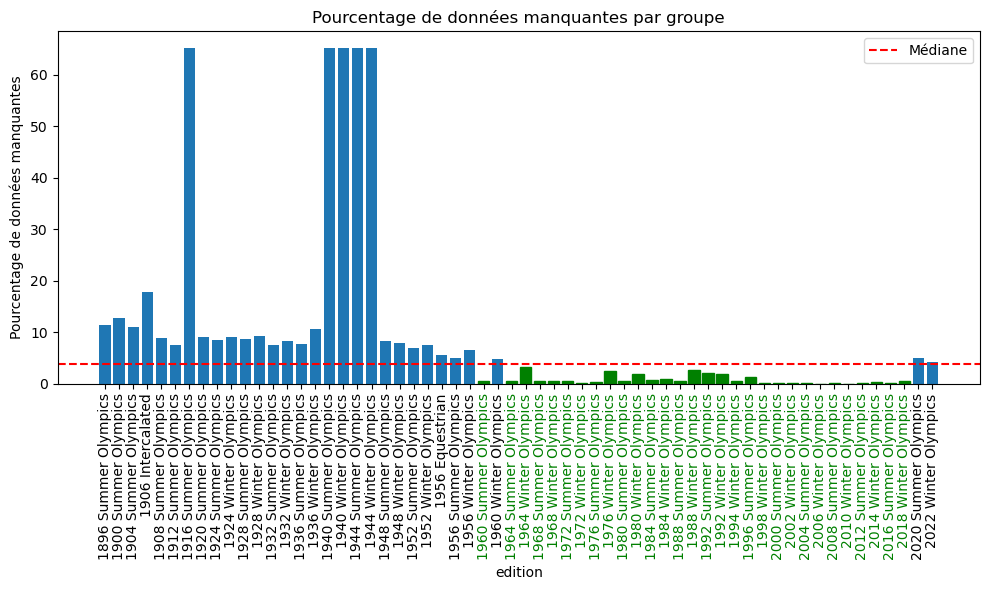

In [28]:
plt.figure(figsize=(10, 6))

# Calculer le pourcentage total de données manquantes par groupe
missing_percentage_total = df.groupby('edition').apply(lambda x: x.isna().sum().sum() / x.size) * 100

# Calculer la médiane globale
median_percentage = missing_percentage_total.median()

# Créer le graphique à barres
bars = plt.bar(missing_percentage_total.index, missing_percentage_total.values)

plt.xlabel('edition')
plt.ylabel('Pourcentage de données manquantes')
plt.title('Pourcentage de données manquantes par groupe')

# Mettre les étiquettes à la verticale
plt.xticks(rotation='vertical')

# Ajouter une ligne pour la médiane globale
plt.axhline(median_percentage, color='r', linestyle='--', label='Médiane')
plt.legend()

# Colorer les barres en dessous de la médiane en vert
for i, bar in enumerate(bars):
    percentage = missing_percentage_total.values[i]
    if percentage < median_percentage:
        bar.set_color('g')

# Colorer les noms des groupes en dessous de la médiane en vert
for i, tick in enumerate(plt.gca().xaxis.get_major_ticks()):
    percentage = missing_percentage_total.values[i]
    if percentage < median_percentage:
        tick.label1.set_color('g')

# Sauvegarder le graphique (à positionner AVANT plt.show())
plt.tight_layout() # garantie que tous les éléments seront correctement ajustés dans la figure
plt.savefig("Pourcentage_de_données_manquante_par_olympiades.svg") # Vectoriel
plt.savefig("Pourcentage_de_données_manquante_par_olympiades.png") # Le + utilisé
# Afficher le graphique
plt.show()



Il y a 5 années pour lesquelles aucun résultats n'est disponible (celles remontant un manque de données de 70%) <br>
ne remonte que l'olympiade et les données associées (date, lieu, ... cf ci-dessous)

In [29]:
df.loc[(df['ed_id']==56),:]

,edition,ed_id,ed_year,ed_type,ed_city,ed_noc,ed_country,competition_date,sport,event,result_id,athlete,athl_id,pos,isTeamSport,sex,born,b_year,age,height,weight,athl_country,athl_noc
256124,1944 Winter Olympics,56,1944,Winter,Cortina d'Ampezzo,ITA,Italy,—,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pour la suite du projet nous décidons de ne garder que les données de 1948 à 2022.

* 1 - df_final de 1960 à 2022


In [30]:
df_final = df.loc[(df['ed_year'] >= 1960) & (df['ed_year'] <= 2022),:]

In [31]:
# Calcul du nombres de données manquantes du fichier d'origine
df.isna().sum()

edition                 0
ed_id                   0
ed_year                 0
ed_type                 0
ed_city                 0
ed_noc                  0
ed_country              0
competition_date        0
sport                   5
event                   5
result_id               5
athlete                 5
athl_id                 5
pos                     5
isTeamSport             5
sex                     5
born                 5760
b_year               6046
age                  6046
height              86871
weight              86871
athl_country            5
athl_noc                5
dtype: int64

In [32]:
# Calcul du nombres de données manquantes du fichier modifié
df_final.isna().sum()

edition                 0
ed_id                   0
ed_year                 0
ed_type                 0
ed_city                 0
ed_noc                  0
ed_country              0
competition_date        0
sport                   0
event                   0
result_id               0
athlete                 0
athl_id                 0
pos                     0
isTeamSport             0
sex                     0
born                  799
b_year                856
age                   856
height              26262
weight              26262
athl_country            0
athl_noc                0
dtype: int64

Voyons si les données des athlètes ('born', 'bYear', 'Age', 'height', 'weight') ne se trouvent pas ailleurs dans le DataFrame.

In [33]:
"""
# Les méthodes ffill et bfill permettent de remplacer les valeurs manquantes dans un DataFrame (ffill: en avant et bfill: en arrière)
df_temp = df_final
df_temp['born'] = df_temp.groupby('athlete')['born'].transform(lambda x: x.ffill().bfill())
df_temp['b_year'] = df_temp.groupby('athlete')['b_year'].transform(lambda x: x.ffill().bfill())
df_temp['age'] = df_temp.groupby('athlete')['age'].transform(lambda x: x.ffill().bfill())
df_temp['height'] = df_temp.groupby('athlete')['height'].transform(lambda x: x.ffill().bfill())
df_temp['weight'] = df_temp.groupby('athlete')['weight'].transform(lambda x: x.ffill().bfill())
"""

# Version améliorée
columns_to_fill = ['born', 'b_year', 'age', 'height', 'weight']
df_final[columns_to_fill] = df_final.groupby('athlete')[columns_to_fill].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

C:\Users\capit\AppData\Local\Temp\ipykernel_15296\285219453.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[columns_to_fill] = df_final.groupby('athlete')[columns_to_fill].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [34]:
# Vérification du nombre de données manquantes
df_final.isna().sum()

edition                 0
ed_id                   0
ed_year                 0
ed_type                 0
ed_city                 0
ed_noc                  0
ed_country              0
competition_date        0
sport                   0
event                   0
result_id               0
athlete                 0
athl_id                 0
pos                     0
isTeamSport             0
sex                     0
born                  784
b_year                840
age                   840
height              25556
weight              25556
athl_country            0
athl_noc                0
dtype: int64

Nous avons récupérer quelques lignes.<br>
C'est peu, mais c'est déjà ça.

In [35]:
# Calul du pourcentage de valeurs manquantes ( soit 'NaN' soit 'na')
nan_percentage = df_final.isna().sum().sum() / (df_final.shape[0] * df_final.shape[1]) * 100
na_percentage = (df_final == 'na').sum().sum() / (df_final.shape[0] * df_final.shape[1]) * 100

total_percentage = nan_percentage + na_percentage
total_percentage

0.9614420050882347

In [36]:
# Calcul du nombre de lignes et de colonnes sur le nouveau df
df_final.shape

(242281, 23)

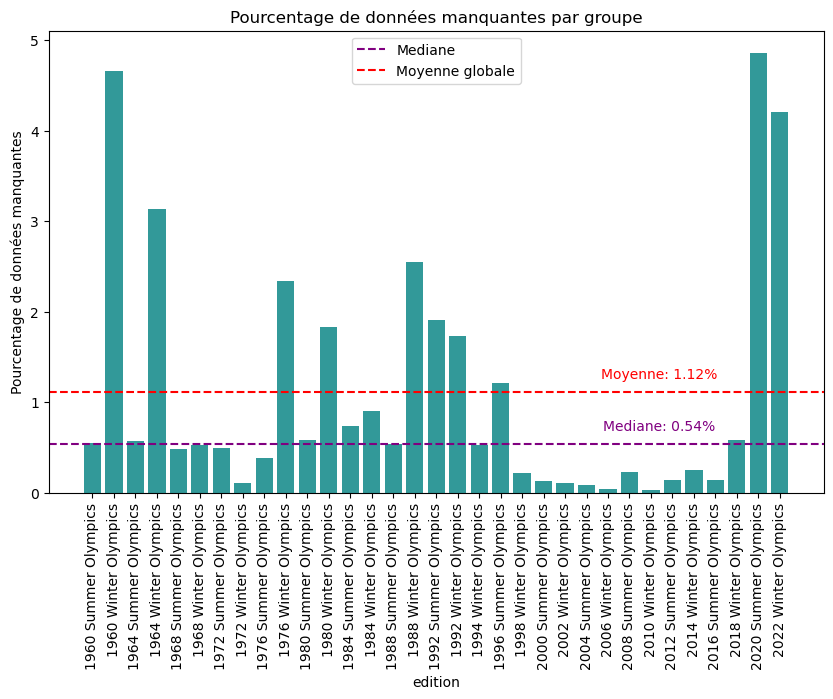

In [37]:
# Calculer le pourcentage total de données manquantes par groupe
missing_percentage_total = df_final.groupby('edition').apply(lambda x: x.isna().sum().sum()/ x.size)*100

# Calculer la médiane globale
median_percentage = missing_percentage_total.median()

# Calculer la moyenne globale
mean_percentage = missing_percentage_total.mean()

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(missing_percentage_total.index, missing_percentage_total.values)
plt.xlabel('edition')
plt.ylabel('Pourcentage de données manquantes')
plt.title('Pourcentage de données manquantes par groupe')

# Mettre les étiquettes à la verticale
plt.xticks(rotation='vertical')

# Ajouter une ligne pour la moyenne globale
plt.axhline(median_percentage, color='purple', linestyle='--', label='Mediane')
plt.axhline(mean_percentage, color='r', linestyle='--', label='Moyenne globale')
plt.legend()

plt.text(len(missing_percentage_total)/1.25, median_percentage+0.15, f"Mediane: {median_percentage:.2f}%", ha='center', color='purple')
plt.text(len(missing_percentage_total)/1.25, mean_percentage+0.15, f"Moyenne: {mean_percentage:.2f}%", ha='center', color='red')


plt.bar(missing_percentage_total.index, missing_percentage_total.values,color= '#329999')

# Afficher le graphique
plt.show()

* Calcul de l'interval de confiance 

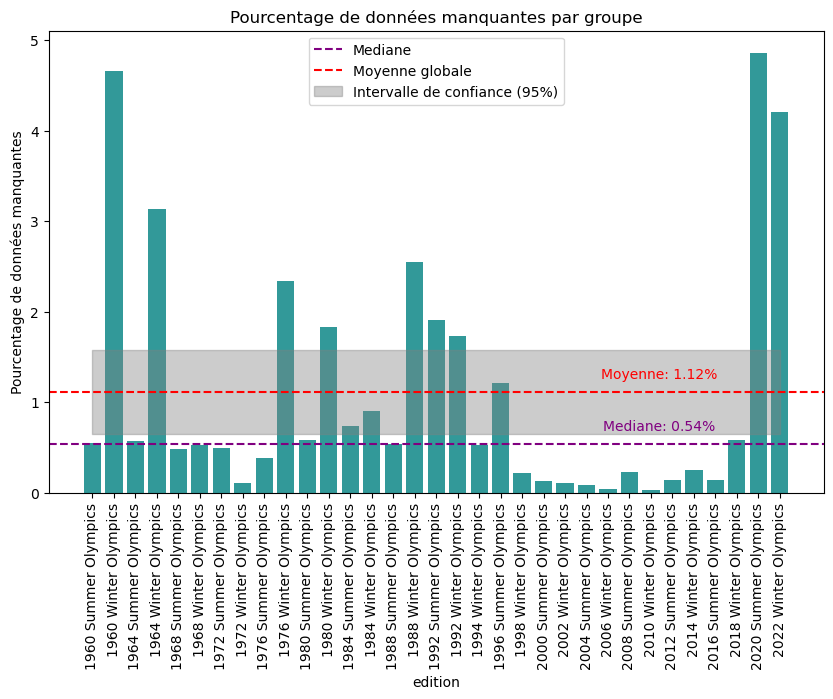

In [38]:
# Calculer l'intervalle de confiance
confidence_interval = 1.96 * missing_percentage_total.std() / np.sqrt(len(missing_percentage_total))

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(missing_percentage_total.index, missing_percentage_total.values, color='#329999')
plt.xlabel('edition')
plt.ylabel('Pourcentage de données manquantes')
plt.title('Pourcentage de données manquantes par groupe')

# Mettre les étiquettes à la verticale
plt.xticks(rotation='vertical')

# Ajouter une ligne pour la médiane
plt.axhline(median_percentage, color='purple', linestyle='--', label='Mediane')

# Ajouter une ligne pour la moyenne
plt.axhline(mean_percentage, color='r', linestyle='--', label='Moyenne globale')

plt.text(len(missing_percentage_total)/1.25, median_percentage+0.15, f"Mediane: {median_percentage:.2f}%", ha='center', color='purple')
plt.text(len(missing_percentage_total)/1.25, mean_percentage+0.15, f"Moyenne: {mean_percentage:.2f}%", ha='center', color='red')

# Ajouter la zone grise de l'intervalle de confiance
plt.fill_between(missing_percentage_total.index, mean_percentage - confidence_interval, mean_percentage + confidence_interval, color='gray', alpha=0.4, label='Intervalle de confiance (95%)')

# Afficher les légendes
plt.legend()

# Afficher le graphique
plt.show()


# ======================================

# Machine Learning

# ======================================

In [39]:
# Affichage des 5 premières lignes du DataFrame
df_final.head()

,edition,ed_id,ed_year,ed_type,ed_city,ed_noc,ed_country,competition_date,sport,event,result_id,athlete,athl_id,pos,isTeamSport,sex,born,b_year,age,height,weight,athl_country,athl_noc
65437,1960 Summer Olympics,15,1960,Summer,Roma,ITA,Italy,25 August – 11 September,Athletics,"100 metres, Men",59618.0,Abdul Hadi Shekaib,64261.0,7 h6 r1/4,False,Male,1940-04-27,1940.0,20.0,178.0,68.0,Afghanistan,AFG
65438,1960 Summer Olympics,15,1960,Summer,Roma,ITA,Italy,25 August – 11 September,Athletics,"200 metres, Men",59638.0,Ali Zaid,64265.0,6 h8 r1/4,False,Male,1940-06-02,1940.0,20.0,168.0,58.0,Afghanistan,AFG
65439,1960 Summer Olympics,15,1960,Summer,Roma,ITA,Italy,25 August – 11 September,Athletics,"400 metres, Men",59661.0,Habib Sayed,64262.0,7 h1 r1/4,False,Male,1936-12-18,1936.0,24.0,170.0,58.0,Afghanistan,AFG
65440,1960 Summer Olympics,15,1960,Summer,Roma,ITA,Italy,25 August – 11 September,Athletics,"800 metres, Men",59681.0,Abdul Ghafar Ghafoori,64257.0,DNS,False,Male,1937-09-15,1937.0,23.0,172.0,70.0,Afghanistan,AFG
65441,1960 Summer Olympics,15,1960,Summer,Roma,ITA,Italy,25 August – 11 September,Athletics,"1,500 metres, Men",59701.0,Abdul Ghafar Ghafoori,64257.0,DNS,False,Male,1937-09-15,1937.0,23.0,172.0,70.0,Afghanistan,AFG


In [40]:
# Calcul du nombre de lignes et de colonnes
df_final.shape

(242281, 23)

### Préparation des données pour le Machine learning

In [41]:
# Trie du DataFrame
df_final = df_final.sort_values(['athl_id','event', 'ed_id'])

* Transformation de la colonne 'pos' en 'f_rank' et 'q_rank' pour différencier les rangs en finales des rang en qualifications 

In [42]:

# Fonction pour extraire les données numériques de la colonne 'pos'
def extract_numeric_rank(value):
    if pd.isnull(value):
        return None
    if isinstance(value, int):
        return value
    if isinstance(value, str):
        # Vérifier si la valeur commence par '='
        if value.startswith('='):
            # Extraire les chiffres de la valeur (en ignorant les caractères non numériques)
            numeric_chars = ''.join(filter(str.isdigit, value))
            if numeric_chars:
                return int(numeric_chars)
        if value.isdigit():
            return int(value)
    return None

# Appliquer la fonction sur la colonne 'pos' pour créer la colonne 'f_rank'
df_final['f_rank'] = df_final['pos'].apply(extract_numeric_rank)

"""
# Pas retenu dans notre façon de procéder. (A étudier pour plus tard)
# Créer la colonne 'other_rank' avec les autres données de la colonne 'pos'
df_final['q_rank'] = df_final['pos'].apply(lambda x: x if pd.isnull(extract_numeric_rank(x)) else None)
"""

# Insertion des colonnes à la position souhaitée
after_column = 'pos'
column_index = df_final.columns.get_loc(after_column)

#df_final.insert(column_index +1, 'q_rank', df_final.pop('q_rank'))
df_final.insert(column_index +1, 'f_rank', df_final.pop('f_rank'))



In [43]:
# Calcul du nombre de données manquantes
df_final.isna().sum()

edition                 0
ed_id                   0
ed_year                 0
ed_type                 0
ed_city                 0
ed_noc                  0
ed_country              0
competition_date        0
sport                   0
event                   0
result_id               0
athlete                 0
athl_id                 0
pos                     0
f_rank              42472
isTeamSport             0
sex                     0
born                  784
b_year                840
age                   840
height              25556
weight              25556
athl_country            0
athl_noc                0
dtype: int64

* Ajout de features supplémentaires

In [44]:
# Fonction pour ajouter la colonne 'nb_participation'
def calculate_nb_participation(df):
    df['nb_participation'] = df.groupby(['athl_id', 'event']).cumcount()
    return df

# Fonction pour ajouter la colonne 'rank_n1'
def calculate_rank_n1(df):
    df['rank_n1'] = df.groupby(['athl_id', 'event'])['f_rank'].shift().fillna(np.inf)
    df['rank_n1'] = df.groupby(['athl_id'])['rank_n1'].transform(lambda x: x.min() if np.isinf(x.min()) else x)
    return df

# Fonction pour ajouter la colonne 'best_rank'
def calculate_best_rank(df):
    df['best_rank'] = df.groupby(['athl_id', 'event'])['f_rank'].shift().fillna(np.inf)
    df['best_rank'] = df.groupby(['athl_id', 'event'])['best_rank'].apply(lambda x: x if np.isinf(x.min()) else x.expanding().min())
    df['best_rank'] = df['best_rank'].fillna(np.inf)
    return df


# Fonction pour ajouter la colonne 'medal_n'
def calculate_medal_n(df):
    df['medal_n'] = df['f_rank'] <= 3
    df['medal_n'] = df['medal_n'].astype(int)
    return df

# Fonction pour ajouter la colonne 'medal_n1'
def calculate_medal_n1(df):
    df['medal_n1'] = df.groupby(['athl_id', 'event'])['f_rank'].shift() <= 3
    df['medal_n1'] = df['medal_n1'].astype(int)
    return df

# Fonction pour ajouter la colonne 'total_medals'
def calculate_total_medals(df):
    df['total_medals'] = df[df['f_rank'].shift() <= 3].groupby(['athl_id', 'event'])['medal_n1'].cumsum()
    df['total_medals'] = df['total_medals'].fillna(0)
    return df

# Appliquer les calculs en utilisant transform
df_final = calculate_nb_participation(df_final)
df_final = calculate_rank_n1(df_final)
df_final = calculate_best_rank(df_final)
df_final = calculate_medal_n(df_final)
df_final = calculate_medal_n1(df_final)
df_final = calculate_total_medals(df_final)


# Réinitialiser l'index
df_final.reset_index(drop=True, inplace=True)

C:\Users\capit\AppData\Local\Temp\ipykernel_15296\2107423706.py:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['best_rank'] = df.groupby(['athl_id', 'event'])['best_rank'].apply(lambda x: x if np.isinf(x.min()) else x.expanding().min())


In [45]:
# Calcul du nombre de données manquantes
df_final.isna().sum()

edition                 0
ed_id                   0
ed_year                 0
ed_type                 0
ed_city                 0
ed_noc                  0
ed_country              0
competition_date        0
sport                   0
event                   0
result_id               0
athlete                 0
athl_id                 0
pos                     0
f_rank              42472
isTeamSport             0
sex                     0
born                  784
b_year                840
age                   840
height              25556
weight              25556
athl_country            0
athl_noc                0
nb_participation        0
rank_n1                 0
best_rank               0
medal_n                 0
medal_n1                0
total_medals            0
dtype: int64

In [46]:
# Afficher le DataFrame mis à jour
df_final.head()


,edition,ed_id,ed_year,ed_type,ed_city,ed_noc,ed_country,competition_date,sport,event,result_id,athlete,athl_id,pos,f_rank,isTeamSport,sex,born,b_year,age,height,weight,athl_country,athl_noc,nb_participation,rank_n1,best_rank,medal_n,medal_n1,total_medals
0,1996 Summer Olympics,24,1996,Summer,Atlanta,USA,United States,20 July – 4 August,Tennis,"Doubles, Men",45511.0,Arnaud Boetsch,2.0,=17,17.0,True,Male,1969-04-01,1969.0,27.0,183.0,76.0,France,FRA,0,inf,inf,0,0,0.0
1,1996 Summer Olympics,24,1996,Summer,Atlanta,USA,United States,20 July – 4 August,Tennis,"Singles, Men",45440.0,Arnaud Boetsch,2.0,=17,17.0,False,Male,1969-04-01,1969.0,27.0,183.0,76.0,France,FRA,0,inf,inf,0,0,0.0
2,1992 Summer Olympics,23,1992,Summer,Barcelona,ESP,Spain,24 July – 9 August,Table Tennis,"Doubles, Men",47282.0,Nicolas Chatelain,6.0,=17,17.0,True,Male,1970-01-13,1970.0,22.0,181.0,70.0,France,FRA,0,inf,inf,0,0,0.0
3,1992 Summer Olympics,23,1992,Summer,Barcelona,ESP,Spain,24 July – 9 August,Table Tennis,"Singles, Men",47135.0,Nicolas Chatelain,6.0,=33,33.0,False,Male,1970-01-13,1970.0,22.0,181.0,70.0,France,FRA,0,inf,inf,0,0,0.0
4,1992 Summer Olympics,23,1992,Summer,Barcelona,ESP,Spain,24 July – 9 August,Table Tennis,"Doubles, Men",47282.0,Patrick Chila,7.0,=17,17.0,True,Male,1969-11-27,1969.0,23.0,180.0,73.0,France,FRA,0,inf,inf,0,0,0.0


### Tests de validité

In [47]:
df_final.loc[(df_final['athl_id']==7),:]
#df_final.loc[df_final['athl_id'] == 7].sort_values(['event', 'ed_id'])

# 93280 = Ian Thorpe
# 93860 = Michael Phelps
# 112724 = Teddy Riner

,edition,ed_id,ed_year,ed_type,ed_city,ed_noc,ed_country,competition_date,sport,event,result_id,athlete,athl_id,pos,f_rank,isTeamSport,sex,born,b_year,age,height,weight,athl_country,athl_noc,nb_participation,rank_n1,best_rank,medal_n,medal_n1,total_medals
4,1992 Summer Olympics,23,1992,Summer,Barcelona,ESP,Spain,24 July – 9 August,Table Tennis,"Doubles, Men",47282.0,Patrick Chila,7.0,=17,17.0,True,Male,1969-11-27,1969.0,23.0,180.0,73.0,France,FRA,0,inf,inf,0,0,0.0
5,1996 Summer Olympics,24,1996,Summer,Atlanta,USA,United States,20 July – 4 August,Table Tennis,"Doubles, Men",47711.0,Patrick Chila,7.0,=9,9.0,True,Male,1969-11-27,1969.0,27.0,180.0,73.0,France,FRA,1,17.0,17.0,0,0,0.0
6,2000 Summer Olympics,25,2000,Summer,Sydney,AUS,Australia,13 September – 1 October,Table Tennis,"Doubles, Men",48121.0,Patrick Chila,7.0,3,3.0,True,Male,1969-11-27,1969.0,31.0,180.0,73.0,France,FRA,2,9.0,9.0,1,0,0.0
7,1996 Summer Olympics,24,1996,Summer,Atlanta,USA,United States,20 July – 4 August,Table Tennis,"Singles, Men",47562.0,Patrick Chila,7.0,=9,9.0,False,Male,1969-11-27,1969.0,27.0,180.0,73.0,France,FRA,0,inf,inf,0,0,0.0
8,2004 Summer Olympics,26,2004,Summer,Athina,GRE,Greece,11 – 29 August,Table Tennis,"Singles, Men",48369.0,Patrick Chila,7.0,=17,17.0,False,Male,1969-11-27,1969.0,35.0,180.0,73.0,France,FRA,1,9.0,9.0,0,0,0.0
9,2008 Summer Olympics,53,2008,Summer,Beijing,CHN,People's Republic of China,6 – 24 August,Table Tennis,"Singles, Men",262349.0,Patrick Chila,7.0,=49,49.0,False,Male,1969-11-27,1969.0,39.0,180.0,73.0,France,FRA,2,17.0,9.0,0,0,0.0


In [48]:
# Vérification du type de données par colonne
df_final.dtypes

edition              object
ed_id                 int64
ed_year               int64
ed_type              object
ed_city              object
ed_noc               object
ed_country           object
competition_date     object
sport                object
event                object
result_id           float64
athlete              object
athl_id             float64
pos                  object
f_rank              float64
isTeamSport          object
sex                  object
born                 object
b_year              float64
age                 float64
height              float64
weight              float64
athl_country         object
athl_noc             object
nb_participation      int64
rank_n1             float64
best_rank           float64
medal_n               int32
medal_n1              int32
total_medals        float64
dtype: object

In [49]:
# Suppression des sports d'équipe
df_final = df_final[df_final['isTeamSport'] == False]

# Remplissage des NaN dans les colonnes 'height' et 'weight' par la médiane groupée par 'event'
df_final['height'] = df_final.groupby(['sport', 'event', 'sex'])['height'].transform(lambda x: x.fillna(x.median()))
df_final['weight'] = df_final.groupby(['sport', 'event', 'sex'])['weight'].transform(lambda x: x.fillna(x.median()))


# Suppression des colonnes indésirables
cols_to_drop = ['edition', 
                #'ed_id', 
                'ed_city', 
                'ed_noc', 
                'competition_date',
                #'result_id', 
                #'athlete', 
                #'athl_id', 
                'pos', 
                'isTeamSport',
                'born',
                'b_year', 
                'athl_noc']
                
df_final = df_final.drop(columns=cols_to_drop)


# Réinitialisation de l'index
df_final.reset_index(drop=True, inplace=True)

df_final = df_final.sort_values(['athl_id','event', 'ed_id'])


In [50]:
# Calcul du nombre de données manquantes 
df_final.isna().sum()

ed_id                   0
ed_year                 0
ed_type                 0
ed_country              0
sport                   0
event                   0
result_id               0
athlete                 0
athl_id                 0
f_rank              34666
sex                     0
age                   508
height                247
weight                247
athl_country            0
nb_participation        0
rank_n1                 0
best_rank               0
medal_n                 0
medal_n1                0
total_medals            0
dtype: int64

In [51]:
"""
# Manipulations ultérieures

# Remplacer les 'f_rank' manquants par 999
df_final['f_rank'] = df_final['f_rank'].fillna(999)

# Supprimer les lignes contenant des NaN dans les colonnes spécifiques
df_final = df_final.dropna(subset=['age', 'height', 'weight'])

# Réinitialiser l'index si nécessaire
df_final.reset_index(drop=True, inplace=True)
"""

"\n# Manipulations ultérieures\n\n# Remplacer les 'f_rank' manquants par 999\ndf_final['f_rank'] = df_final['f_rank'].fillna(999)\n\n# Supprimer les lignes contenant des NaN dans les colonnes spécifiques\ndf_final = df_final.dropna(subset=['age', 'height', 'weight'])\n\n# Réinitialiser l'index si nécessaire\ndf_final.reset_index(drop=True, inplace=True)\n"

In [52]:
df_final.isna().sum()

ed_id                   0
ed_year                 0
ed_type                 0
ed_country              0
sport                   0
event                   0
result_id               0
athlete                 0
athl_id                 0
f_rank              34666
sex                     0
age                   508
height                247
weight                247
athl_country            0
nb_participation        0
rank_n1                 0
best_rank               0
medal_n                 0
medal_n1                0
total_medals            0
dtype: int64

In [53]:
df_final.shape

(148627, 21)

In [54]:
df_final.head()

,ed_id,ed_year,ed_type,ed_country,sport,event,result_id,athlete,athl_id,f_rank,sex,age,height,weight,athl_country,nb_participation,rank_n1,best_rank,medal_n,medal_n1,total_medals
0,24,1996,Summer,United States,Tennis,"Singles, Men",45440.0,Arnaud Boetsch,2.0,17.0,Male,27.0,183.0,76.0,France,0,inf,inf,0,0,0.0
1,23,1992,Summer,Spain,Table Tennis,"Singles, Men",47135.0,Nicolas Chatelain,6.0,33.0,Male,22.0,181.0,70.0,France,0,inf,inf,0,0,0.0
2,24,1996,Summer,United States,Table Tennis,"Singles, Men",47562.0,Patrick Chila,7.0,9.0,Male,27.0,180.0,73.0,France,0,inf,inf,0,0,0.0
3,26,2004,Summer,Greece,Table Tennis,"Singles, Men",48369.0,Patrick Chila,7.0,17.0,Male,35.0,180.0,73.0,France,1,9.0,9.0,0,0,0.0
4,53,2008,Summer,People's Republic of China,Table Tennis,"Singles, Men",262349.0,Patrick Chila,7.0,49.0,Male,39.0,180.0,73.0,France,2,17.0,9.0,0,0,0.0


In [55]:
# Export du df_ML

#df_final.to_csv(r'C:\Users\capit\Desktop\Projet Jedha\df_final.csv',index=False)
df_final.to_csv('df_ML.csv',index=False)

Suppression des colonnes (manipulation dans 'Dataiku' !)
*   edition 
*   ed_id #
*   ed_city
*   ed_noc
*   competition_date
*   result_id #
*   athlete #
*   athl_id #
*   pos
*   IsTeamSport
*   born
*   b_year
*   athl_noc


Split des années 2020 et 2022 dans 'Dataiku' pour évaluation des modèles